In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [87]:
df = pd.read_csv('fifa.csv')  # importing a csv file
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Determining the DataType of Each Column

In [88]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

### Convert to Float after getting rid of currency symbol and suffix.

In [89]:
df['Value'] = df['Value'].replace({'€': '', 'K':'', 'M':''}, regex = True)

In [90]:
df['Value'] = df['Value'].astype(float)

### Convert to Float after getting rid of currency symbol and suffix.

In [91]:
df['Wage'] = df['Wage'].replace({'€': '', 'K':'', 'M':''}, regex = True)

In [92]:
df['Wage'] = df['Wage'].astype(float)

In [93]:
df['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

### Convert to int with only year

In [94]:
df['Joined'] = df['Joined'].str.slice(7,12) 

In [95]:
df['Joined'] = pd.to_numeric(df['Joined']).astype('float64')

### Convert to datetime type

In [96]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

### Convert to Float with decimal points

In [97]:
df['Height'] = df['Height'].str.replace(" ' ", " . ")

### Remove the suffix and convert to float

In [98]:
df['Weight'] = df['Weight'].replace({'lbs': ""}, regex = True)

In [99]:
df['Weight'] = df['Weight'].astype('float64')

### Convert to Float after getting rid of currency symbol and suffix.

In [100]:
df['Release Clause'] = df['Release Clause'].replace({'€': '', 'K':'', 'M':''}, regex = True)

In [101]:
df['Release Clause'] = df['Release Clause'].astype('float')

### You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.

In [102]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

### Treatment of Null Values

In [103]:
per_null = df['Club'].isnull().sum()/len(df)*100
per_null 
# 1.3% cannot be ignored coz less Null values so we work on nulls ELSE if % would be more we would have dropped it 

1.323666721590597

In [ ]:
df = df.dropna(subset =['Club'])

#The line of code df.dropna(subset=['Club']) removes rows from the DataFrame df where the 'Club' column
#has missing (NaN) values. 

In [105]:
per_Preferredfoot = df['Preferred Foot'].isnull().sum()/len(df)*100
per_Preferredfoot # cannot be ignored 

0.2671713236112657

In [106]:
df = df.dropna(subset =['Preferred Foot'])

In [107]:
per_Position = df['Position'].isnull().sum()/len(df)*100
per_Position # cannot be ignored 

0.0

In [108]:
df = df.dropna(subset =['Position'])

In [109]:
per_joined = df['Joined'].isnull().sum()/len(df)*100
per_joined # cannot be ignored 

7.0543587453956915

In [110]:
df['Joined'] = df['Joined'].fillna(df['Joined'].mean())

In [111]:
per_Loaned = df['Loaned From'].isnull().sum()/len(df)*100
per_Loaned # remove this column

92.94564125460431

In [112]:
# remove 'loaned from' column, since it has about 93% null values
df = df.drop(columns = ['Loaned From'], axis = 1)

In [113]:
per_Contract = df['Contract Valid Until'].isnull().sum()/len(df)*100
per_Contract # cannot be ignored

0.0

In [114]:
per_release = df['Release Clause'].isnull().sum()/len(df)*100
per_release # cannot be ignored

7.115749525616698

In [115]:
df['Release Clause'] = df['Release Clause'].fillna(df['Release Clause'].mean())

In [116]:
df.isnull().sum().sum() # the data now has zero null values

0

## 1. Plot the distribution of Overall rating for all players

## 1.	Plot the distribution of Overall rating for all players. 

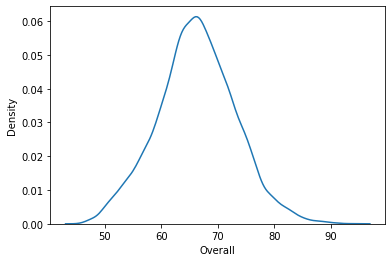

In [117]:
sns.kdeplot(df['Overall'])
plt.show()

## 2. Generate pair plots for the following variables:
### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

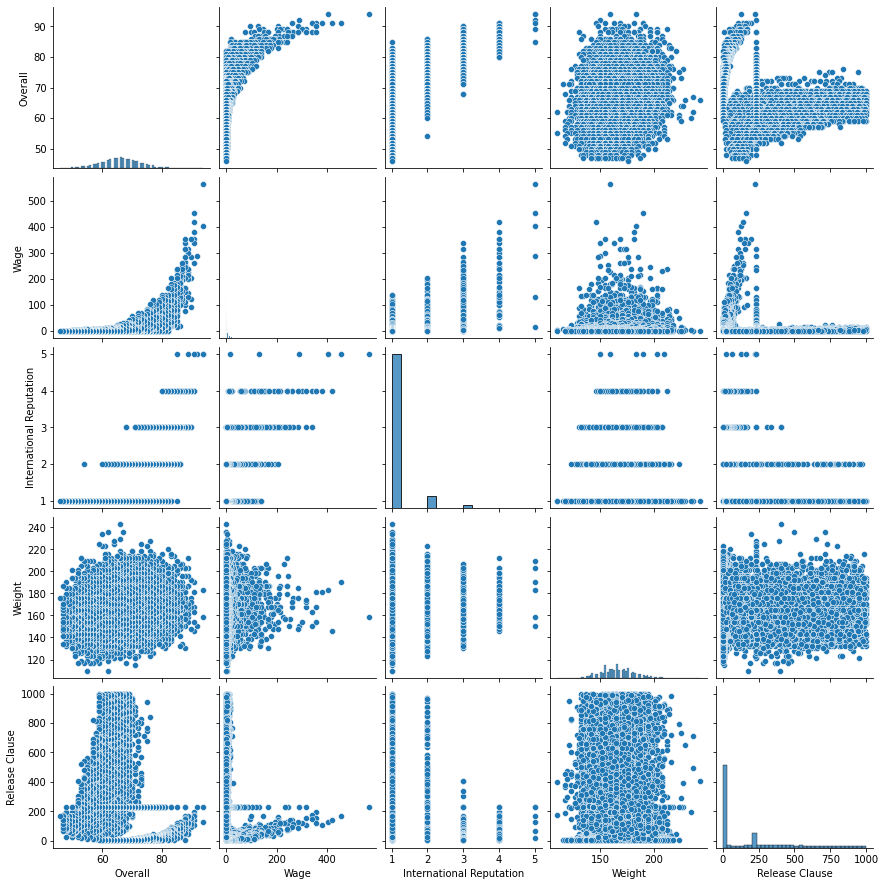

In [118]:
cols = ['Overall','Wage', 'International Reputation','Height','Weight', 'Release Clause' ]
# Take the remaining columns for the second plot; those already include "Outcome"
sns.pairplot(df[cols])
plt.show()

## 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.



In [119]:
df['dense_rank'] = df['Overall'].rank(ascending = False,method = 'dense') 

In [ ]:
df_new = df[(df['dense_rank'] <= 20) & (pd.DatetimeIndex(df['Contract Valid Until']).year == 2020)]

### a)	What would the average wage for this set of players be?

In [ ]:
df_new['Wage'].mean()

In [ ]:
#o/p - 38

### b)	What is the average age?

In [122]:
df_new['Age'].mean()

28.741935483870968

### c)	Is there a correlation between the Overall rating and Value for these players?

In [123]:
df_new[['Overall', 'Value']].corr()

# yes, there is a relation between Overall rating and Value for these players

,Overall,Value
Overall,1.000000,0.071291
Value,0.071291,1.000000


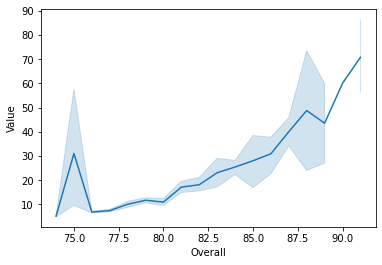

In [124]:
sns.lineplot(data = df_new, x = 'Overall', y = 'Value')
plt.show()

# if overall rating increases, Value also increases.
# if overall rating decreases, value also decreases.

## 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
### a)	Are there any players appearing in more than one Table. Please point out such players.



In [125]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [126]:
df9 = df.copy()

In [127]:
df9['grp'] = df9.groupby('Position')['Overall'].rank(method = 'dense', ascending = False)

In [128]:
df9 = df9[df9['grp'] <= 5]


In [129]:
to = df9[df9['Position'] == 'CAM']

In [130]:
to[['Position','Name','Overall','Wage','grp']]

,Position,Name,Overall,Wage,grp
17,CAM,A. Griezmann,89,145.0,1.0
31,CAM,C. Eriksen,88,205.0,2.0
61,CAM,Roberto Firmino,86,195.0,3.0
66,CAM,T. Müller,86,135.0,3.0
74,CAM,M. Özil,86,190.0,3.0
80,CAM,N. Fekir,85,92.0,4.0
96,CAM,A. Vidal,85,205.0,4.0
101,CAM,R. Nainggolan,85,105.0,4.0
144,CAM,D. Payet,84,75.0,5.0


In [137]:
gq = df9.groupby('Position')['Name'].apply(list)
gq

Position
CAM    [A. Griezmann, C. Eriksen, Roberto Firmino, T....
CB     [D. Godín, S. Umtiti, M. Benatia, N. Otamendi,...
CDM    [Sergio Busquets, Casemiro, M. Pjanić, Fernand...
CF     [Luis Alberto, S. Giovinco, A. Milik, L. Stind...
CM     [Thiago, S. Milinković-Savić, Jorginho, I. Gün...
GK     [De Gea, J. Oblak, M. ter Stegen, T. Courtois,...
LAM    [J. Rodríguez, D. Tadić, Fabrio Farinha, Leo C...
LB     [Marcelo, Jordi Alba, Alex Sandro, D. Alaba, F...
LCB    [G. Chiellini, M. Hummels, K. Koulibaly, J. Ve...
LCM    [T. Kroos, David Silva, M. Hamšík, M. Verratti...
LDM    [N. Kanté, Paulinho, Marquinhos, Lucas Leiva, ...
LF     [E. Hazard, P. Dybala, Iniesta, Jonathan Viera...
LM     [P. Aubameyang, S. Mané, Douglas Costa, M. Reu...
LS     [E. Cavani, G. Higuaín, Diego Costa, A. Gómez,...
LW     [Neymar Jr, L. Insigne, Isco, Coutinho, L. San...
LWB    [N. Schulz, Granell, Jonny, J. Hector, J. Moji...
RAM    [J. Cuadrado, H. Ziyech, Allan Bardinho, Jacso...
RB     [Azpilicueta, C

In [138]:
ty = dict(gq) # converting to dictionary

In [139]:
ty

{'CAM': ['A. Griezmann',
  'C. Eriksen',
  'Roberto Firmino',
  'T. Müller',
  'M. Özil',
  'N. Fekir',
  'A. Vidal',
  'R. Nainggolan',
  'D. Payet'],
 'CB': ['D. Godín',
  'S. Umtiti',
  'M. Benatia',
  'N. Otamendi',
  'Naldo',
  'Miranda',
  'V. Kompany',
  'N. Süle',
  'S. de Vrij',
  'A. Barzagli'],
 'CDM': ['Sergio Busquets',
  'Casemiro',
  'M. Pjanić',
  'Fernandinho',
  'Fabinho',
  'William Carvalho',
  'N. Matić',
  'E. Banega',
  'Danilo Pereira',
  'K. Strootman',
  'Javi Martínez'],
 'CF': ['Luis Alberto',
  'S. Giovinco',
  'A. Milik',
  'L. Stindl',
  'Raffael',
  'Ricardo Goulart',
  'Ayoze Pérez',
  'Y. Ōsako',
  'A. Ruiz',
  'S. Okazaki',
  'G. dos Santos'],
 'CM': ['Thiago',
  'S. Milinković-Savić',
  'Jorginho',
  'I. Gündoğan',
  'N. Keïta',
  'C. Tolisso',
  'A. Rabiot',
  'L. Goretzka',
  'J. Draxler',
  'Cesc Fàbregas',
  'M. Dembélé',
  'Rodri',
  'Fred',
  'G. Kondogbia',
  'M. Götze',
  'G. Bonaventura',
  'A. Guardado'],
 'GK': ['De Gea',
  'J. Oblak',
  '

In [140]:
list_pl = []
for i,j in ty.items():
    for u in j:
        list_pl.append(u)

In [141]:
len(list_pl) # total enteries of the top-5 players from each position 

270

In [142]:
import collections
q = [i for i,count in collections.Counter(list_pl).items() if count > 1]

# finding if there are players which appear in top-5 from each Position

In [143]:
len(q) # all top-5 players are unique in each Position

0

###  b)	What is the average wage one can expect to pay for the top 5 in every position?

In [146]:
df9.groupby('Position')['Wage'].mean()

Position
CAM    149.666667
CB     123.100000
CDM    136.363636
CF      37.818182
CM     101.588235
GK     166.222222
LAM     55.000000
LB     151.333333
LCB    141.142857
LCM    127.636364
LDM    106.777778
LF     104.166667
LM     113.000000
LS     117.666667
LW     173.500000
LWB     33.090909
RAM     38.142857
RB      94.625000
RCB    184.625000
RCM    138.153846
RDM     97.500000
RF     148.000000
RM      88.880000
RS     116.666667
RW     158.538462
RWB     35.500000
ST     243.125000
Name: Wage, dtype: float64

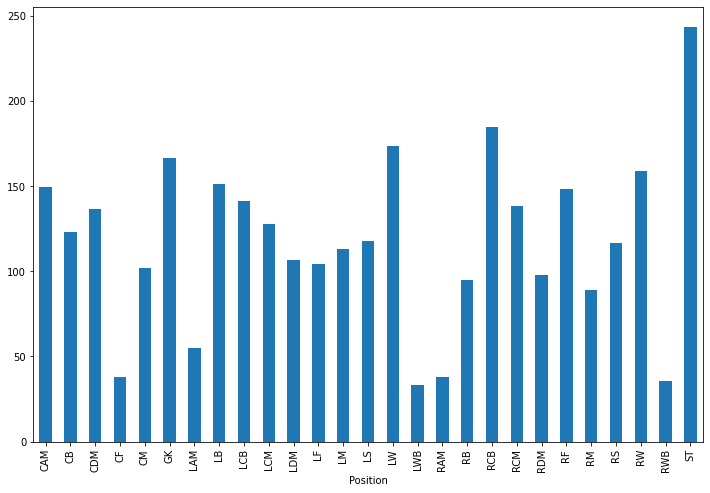

In [144]:
plt.figure(figsize = (12,8))
df9.groupby('Position')['Wage'].mean().plot.bar()
plt.show()